# MNIST Handwritten Image Analysis

In [144]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

from scipy.stats import multivariate_normal as mvn

%matplotlib inline

In [145]:
df = pd.read_csv('usps_digit_recognizer.csv')

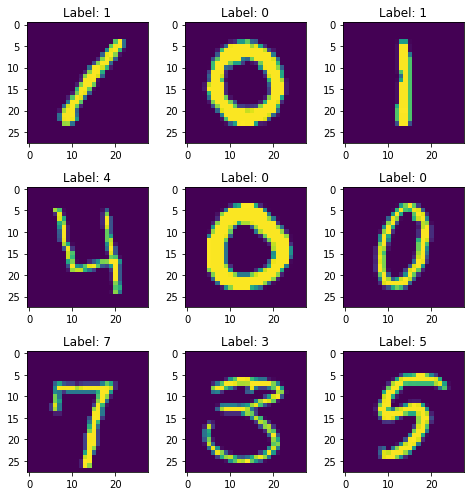

In [146]:
# View a 3 x 3 grid of images
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(np.array(df.iloc[i,1:]).reshape(28,28))
    plt.title(f'Label: {df.label[i]}')
    plt.tight_layout()

In [147]:
#Tried to rotate and append didn't help the model
#df2 = pd.DataFrame([[df['label'][i]] + list(np.rot90(np.array(df.iloc[i,1:]).reshape(28,28)).flatten()) for i in range(len(df['label']))])
#df2.columns = df.columns
#df2.head()
#df = df.append(df2)

In [148]:
X = df.drop("label", axis=1).to_numpy()/255
y = df["label"].to_numpy()

In [149]:
#Split data: train 70% and test 30%
#train = df[:round(df.shape[0]*0.7)]
#test = df[round(df.shape[0]*0.7):]

In [150]:
#Split data: variables and labels
#X_train = train.drop("label", axis=1).to_numpy()
#y_train = train["label"].to_numpy()
#X_test = test.drop("label", axis=1).to_numpy()
#y_test = test["label"].to_numpy()

In [151]:
#Create Gaussian Naive Bayes Classifer
class GaussNB():
    def fit(self, X, y, epsilon = 1e-2):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [152]:
gnb = GaussNB()
gnb.fit(X, y)
y_hat = gnb.predict(X)

In [153]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [154]:
print(f"Accuracy: {accuracy(y, y_hat):0.3f}")

Accuracy: 0.801


In [161]:
#Create Gaussian Bayes Classifer
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-2):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {"mean": mu_k, "cov":(1/(N_k - 1))*np.matmul(X_k.T,X_k-mu_k) + epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [162]:
gb = GaussBayes()
gb.fit(X, y)
yhat = gb.predict(X)

In [163]:
print(f"Accuracy: {accuracy(y, yhat):0.3f}")

Accuracy: 0.961


In [164]:
#Create Multinomial Naive Bayes Classifer
class MultinomiNB():
    def fit(self, X, y, epsilon=1e-3):
        K = len(set(y))
        N = len(y)
        labels = y
        y = np.zeros((N, K))
        y[np.arange(N), labels] = 1

        feature_counts = X.T.dot(y) + epsilon
        class_counts = y.sum(axis=0)

        self.weights = np.log(feature_counts) - np.log(feature_counts.sum(axis=0))
        self.priors = np.log(class_counts) - np.log(class_counts.sum())

    def predict(self, X):
        P = X.dot(self.weights) + self.priors
        return np.argmax(P, axis=1)

In [165]:
mnb = MultinomiNB()
mnb.fit(X, y)
P_hat = gb.predict(X)

In [166]:
print(f"Accuracy: {accuracy(y, P_hat):0.3f}")

Accuracy: 0.961
